In [1]:
import numpy as np

In [16]:
class MyLinealRegression:
    def __init__(self):
        self.w = None
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        assert len(y.shape) == 1 and len(X.shape) == 2
        assert X.shape[0] == y.shape[0]

        y = y[:, np.newaxis]
        l, n = X.shape
        X_train = np.hstack((np.ones((l, 1)), X))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        return self
    
    def predict(self, X):
        l, n = X.shape
        X_train = np.hstack((np.ones((l, 1)), X))

        y_pread = X_train @ self.w
        return y_pread
    
    def get_weights(self):
        return self.w.copy()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
def lineal_regression(x):
    return 5*x + 6

In [13]:
objects_num = 100
X = np.linspace(0, 10, objects_num)
y = lineal_regression(X) + np.random.normal(0, 3, objects_num)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
import matplotlib.pyplot as plt

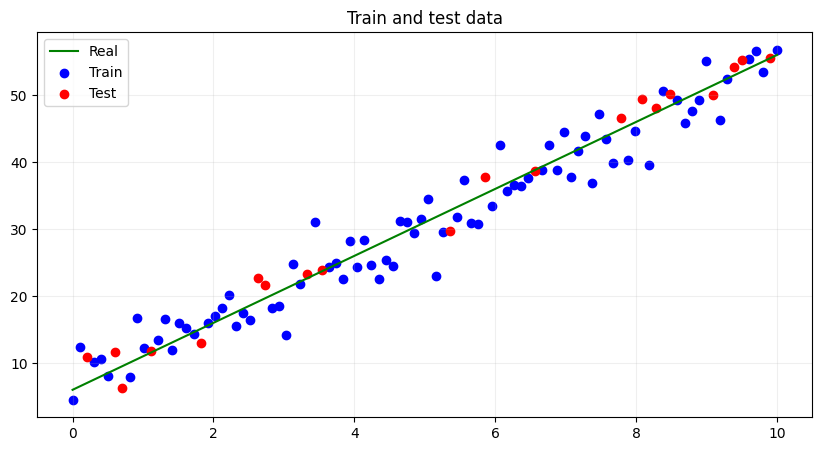

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(X, lineal_regression(X), label='Real', c='g')
plt.scatter(X_train, y_train, label='Train', c='b')
plt.scatter(X_test, y_test, label='Test', c='r')
plt.title('Train and test data')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

### Обучим модель

In [19]:
regressor = MyLinealRegression()

regressor.fit(X_train[:, np.newaxis], y_train)

prediction = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()
w

array([[6.94561973],
       [4.74752176]])

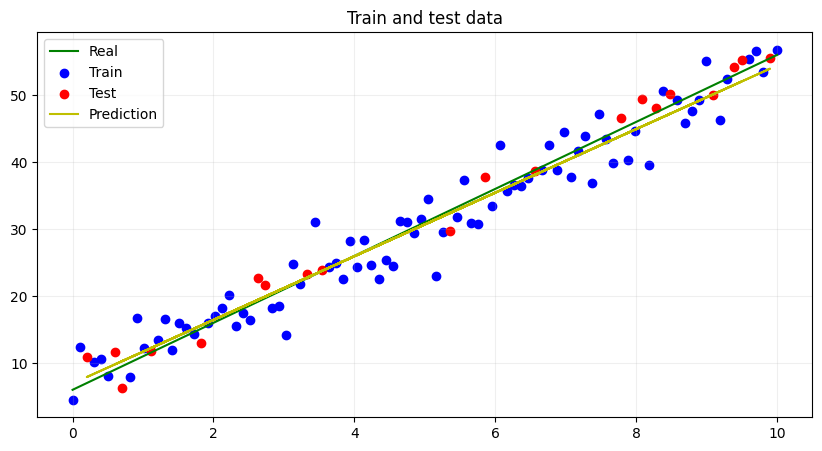

In [18]:
fig = plt.figure(figsize=(10, 5))
plt.plot(X, lineal_regression(X), label='Real', c='g')
plt.scatter(X_train, y_train, label='Train', c='b')
plt.scatter(X_test, y_test, label='Test', c='r')
plt.plot(X_test, prediction, label='Prediction', c='y')
plt.title('Train and test data')
plt.grid(alpha=0.2)
plt.legend()
plt.show()